In [125]:
# Import necessary libraries for analysis, visualization, and formatting
import time  # For tracking execution time
import numpy as np  # For numerical operations
import pandas as pd  # For data manipulation and analysis
import matplotlib.pyplot as plt  # For creating plots with matplotlib

# Import PrettyTable for creating formatted tables
from prettytable import PrettyTable

# Import mlxtend libraries for preprocessing and association rule mining
from mlxtend.preprocessing import TransactionEncoder  # Transforms data for association rule mining
from mlxtend.frequent_patterns import apriori, association_rules, fpgrowth  # For finding frequent itemsets and generating rules

# Import plotly libraries for interactive visualizations
import plotly.graph_objects as go  # For creating interactive plots
import plotly.express as px  # For creating high-level plots easily

In [127]:
# Load the dataset from the specified file path
groceries = pd.read_csv(r"C:\Users\Zahid.Shaikh\100days\65\groceries.csv")

# Print the number of rows and columns to understand the dataset dimensions
print("No. of Rows: ", groceries.shape[0])  # Display the total number of rows
print("No. of Columns: ", groceries.shape[1])  # Display the total number of columns

# Print a separator line for readability in the console output
print('-' * 60)

# Display the dataset to check the initial content and structure
groceries


No. of Rows:  38766
No. of Columns:  3
------------------------------------------------------------


,Member_number,Date,itemDescription
0,1808,21/7/2015,tropical fruit
1,2552,5/1/2015,whole milk
2,2300,19/9/2015,pip fruit
3,1187,12/12/2015,other vegetables
4,3037,1/2/2015,whole milk
...,...,...,...
38761,2022,23/2/2014,candy
38762,1097,16/4/2014,cake bar
38763,1510,3/12/2014,fruit/vegetable juice
38764,1521,26/12/2014,cat food


In [129]:
# Group the grocery data by each unique transaction, defined by 'Member_number' and 'Date'
# For each transaction, extract the 'itemDescription' column and convert it to a list
# This results in a list of lists, where each inner list represents items bought in a single transaction
all_transactions = [transaction[1]['itemDescription'].tolist() for transaction in list(groceries.groupby(['Member_number', 'Date']))]

# Display the total number of transactions processed
print('No. of Transactions: ', len(all_transactions))
print('-' * 70)

# Display the list of first 10 transactions
all_transactions[:10]

No. of Transactions:  14964
----------------------------------------------------------------------


[['sausage', 'whole milk', 'semi-finished bread', 'yogurt'],
 ['whole milk', 'pastry', 'salty snack'],
 ['canned beer', 'misc. beverages'],
 ['sausage', 'hygiene articles'],
 ['soda', 'pickled vegetables'],
 ['whole milk', 'soda'],
 ['beef', 'white bread'],
 ['frankfurter', 'curd'],
 ['frankfurter', 'soda', 'whipped/sour cream'],
 ['sausage', 'whole milk', 'rolls/buns']]

In [131]:
# Transform the dataset into a format suitable for association rule mining

# 1. Instantiate the TransactionEncoder to prepare encoding of transactions
trans_encoder = TransactionEncoder()

# 2. Fit the encoder to the list of transactions and transform it into a binary matrix
#    where each column represents an item, and each row represents a transaction
trans_encoder_matrix = trans_encoder.fit(all_transactions).transform(all_transactions)

# 3. Convert the binary matrix into a DataFrame with items as column names
trans_encoder_matrix = pd.DataFrame(trans_encoder_matrix, columns=trans_encoder.columns_)

# Display the transformed DataFrame
trans_encoder_matrix

,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,beef,berries,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,True,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14959,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
14960,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
14961,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
14962,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [133]:
# Function to calculate frequent itemsets using Fp-Growth or Apriori algorithm
def perform_rule_calculation(transact_items_matrix, rule_type="fpgrowth", min_support=0.001):
    # Initialize timing variables
    start_time = 0
    total_execution = 0

    # Start timer for execution
    start_time = time.time()

    # Calculate frequent itemsets using Fp-Growth algorithm based on specified minimum support
    rule_items = fpgrowth(transact_items_matrix, 
                          min_support=min_support, 
                          use_colnames=True)
    
    # Calculate total time taken to compute Fp-Growth
    total_execution = time.time() - start_time
    print("Computed Fp Growth!")  # Confirmation of successful execution

    # Add a column to store the number of items in each itemset for easier filtering
    rule_items['number_of_items'] = rule_items['itemsets'].apply(lambda x: len(x))

    # Return frequent itemsets along with the execution time
    return rule_items, total_execution

# Function to generate association rules from frequent itemsets
def compute_association_rule(rule_matrix, metric="lift", min_thresh=1):
    # Generate association rules based on specified metric (e.g., lift) and minimum threshold
    rules = association_rules(rule_matrix, 
                              metric=metric, 
                              min_threshold=min_thresh)
    return rules  # Return generated rules


In [135]:
# Initialize a dictionary with a sample item for testing
val = {'name': 12}

# Extract the first key-value pair from the dictionary as a list item
value = list(val.items())[0]

# Execute the FP-Growth algorithm and capture the results along with execution time
fpgrowth_matrix, fp_growth_exec_time = perform_rule_calculation(trans_encoder_matrix)  # Run FP-Growth

# Display the execution time of the FP-Growth algorithm
print("FP-Growth execution took: {} seconds".format(fp_growth_exec_time))

# Print a separator line for clarity
print('-' * 75)

# Display the first few rows of the FP-Growth matrix for an initial view of results
print(fpgrowth_matrix.head())

# Print another separator line for structure
print('-' * 75)

# Display the last few rows of the FP-Growth matrix for final results overview
print(fpgrowth_matrix.tail())

Computed Fp Growth!
FP-Growth execution took: 0.2943580150604248 seconds
---------------------------------------------------------------------------
    support               itemsets  number_of_items
0  0.157912           (whole milk)                1
1  0.085873               (yogurt)                1
2  0.060345              (sausage)                1
3  0.009489  (semi-finished bread)                1
4  0.051724               (pastry)                1
---------------------------------------------------------------------------
      support                         itemsets  number_of_items
745  0.001403            (yogurt, chewing gum)                2
746  0.001069  (other vegetables, chewing gum)                2
747  0.001002              (soda, chewing gum)                2
748  0.001069              (whole milk, pasta)                2
749  0.001002  (seasonal products, rolls/buns)                2


In [136]:
# Compute association rules with lift metric using the FP-Growth algorithm.
# This function takes the preprocessed dataset (fpgrowth_matrix) as input and calculates the frequent itemsets.
# The output is stored in `fp_growth_rule_lift` and displays the top results for inspection.
fp_growth_rule_lift = compute_association_rule(fpgrowth_matrix)
fp_growth_rule_lift.head()  # Display the first few rows of the computed association rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,"(yogurt, whole milk)",(rolls/buns),0.011160,0.109997,0.001337,0.119760,1.088758,0.000109,1.011091,0.082442
1,"(yogurt, rolls/buns)",(whole milk),0.007819,0.157912,0.001337,0.170940,1.082501,0.000102,1.015714,0.076813
2,"(whole milk, rolls/buns)",(yogurt),0.013967,0.085873,0.001337,0.095694,1.114367,0.000137,1.010860,0.104083
3,(yogurt),"(whole milk, rolls/buns)",0.085873,0.013967,0.001337,0.015564,1.114367,0.000137,1.001623,0.112271
4,(whole milk),"(yogurt, rolls/buns)",0.157912,0.007819,0.001337,0.008464,1.082501,0.000102,1.000651,0.090505


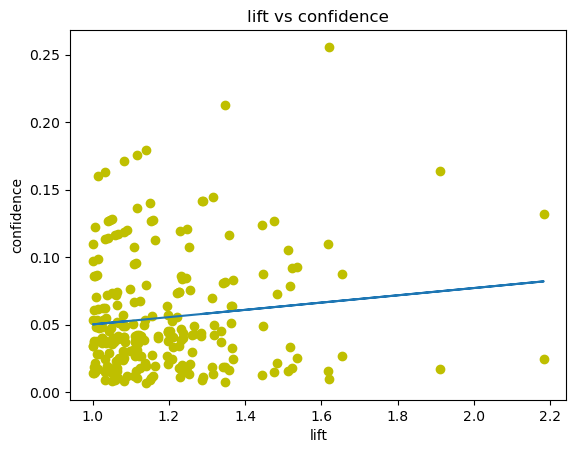

In [139]:
# Plot Lift Vs Coverage(confidence) 
def plot_metrics_relationship(rule_matrix, col1, col2):

    fit = np.polyfit(rule_matrix[col1], rule_matrix[col2], 1)
    fit_funt = np.poly1d(fit)
    plt.plot(rule_matrix[col1], rule_matrix[col2], 'yo', rule_matrix[col1], 
    fit_funt(rule_matrix[col1]))
    plt.xlabel(col1)
    plt.ylabel(col2)
    plt.title('{} vs {}'.format(col1, col2))
plot_metrics_relationship(fp_growth_rule_lift, col1='lift', col2='confidence')

In [141]:
# Compute association rules using the FP-Growth algorithm on the fpgrowth_matrix
# Setting the metric to "confidence" to focus on rules with a high likelihood of the consequent occurring given the antecedent
# Setting a minimum threshold of 0.2 to filter out rules with low confidence
fp_growth_rule = compute_association_rule(fpgrowth_matrix, metric="confidence", min_thresh=0.2)

# Display the first few rows of the resulting association rules
fp_growth_rule.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,"(sausage, yogurt)",(whole milk),0.005747,0.157912,0.001470,0.255814,1.619975,0.000563,1.131555,0.384919
1,"(sausage, rolls/buns)",(whole milk),0.005346,0.157912,0.001136,0.212500,1.345683,0.000292,1.069318,0.258264


<p><center>Made with by ❤  Zahid Salim Shaikh</p>